In [37]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt


In [38]:
from google.colab import files
from google.colab import drive

drive.mount ('/content/drive')

Mounted at /content/drive


In [114]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid19.csv")

In [46]:
data2=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/covidspread.xlsx")


In [118]:
# capa= tf.keras.layers.Dense(units=1, input_shape=[1])
# modelo = tf.keras.Sequential([capa])

oculta1=tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2=tf.keras.layers.Dense(units=2)
salida=tf.keras.layers.Dense(units=1)
modelo= tf.keras.Sequential([oculta1,oculta2,salida])


oculta1r=tf.keras.layers.Dense(units=50, input_shape=[1])
oculta2r=tf.keras.layers.Dense(units=50)
salidar=tf.keras.layers.Dense(units=1)
modelor= tf.keras.Sequential([oculta1r,oculta2r,salidar])

In [119]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.05),
    loss='mean_squared_error'
)
modelor.compile(
    optimizer = tf.keras.optimizers.Adam(0.05),
    loss='mean_squared_error'
)

In [120]:
print("Comenzando entrenamiento...")
historial = modelo.fit(data2.num_cases,data2.Muertes,epochs=1000, verbose=False)
historialr = modelor.fit(data2.num_cases,data2.Recuperados,epochs=1000, verbose=False)
print("¡Modelo Entrenado!")

Comenzando entrenamiento...
¡Modelo Entrenado!


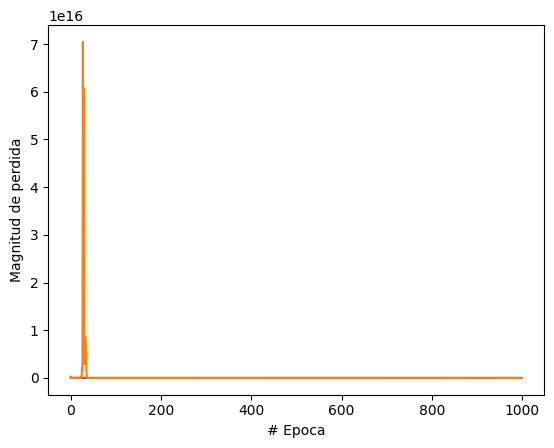

In [121]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])
plt.plot(historialr.history["loss"])

In [136]:
print("Hagamos una prediccion")
num_casos1=int(input("Ingrese numero de casos: "))
resultado= modelo.predict([num_casos1])
resultador= modelor.predict([num_casos1])
print ("el resultado es " + str(int(resultado)) + " muertes!")
print ("el resultado es " + str(int(resultador)) + " recuperados!")

Hagamos una prediccion
Ingrese numero de casos: 25000
1/1 [==============================] - 0s 43ms/step
el resultado es 255 muertes!
el resultado es 22096 recuperados!
